<a href="https://colab.research.google.com/github/Nardy07/majorproj/blob/main/binary_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.optimizers import SGD


In [2]:
df1= pd.read_csv('/content/data/Normal_data.csv')
df2=pd.read_csv('/content/data/metasploitable-2.csv')

In [ ]:
df1

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68419,185.127.17.56-192.168.20.133-443-36100-6,192.168.20.133,36100,185.127.17.56,443,6,5/2/2020 19:20,1895,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68420,192.168.20.133-192.168.20.2-53032-53-17,192.168.20.133,53032,192.168.20.2,53,17,5/2/2020 19:21,3842,1,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68421,192.168.20.133-192.168.20.2-39285-53-17,192.168.20.133,39285,192.168.20.2,53,17,5/2/2020 19:19,3731,1,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68422,192.168.20.133-192.168.20.2-49895-53-17,192.168.20.133,49895,192.168.20.2,53,17,5/2/2020 19:18,20591,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
df2

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10/1/2020 5:02,269709,4,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
1,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10/1/2020 5:02,268599,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
2,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747,192.168.3.130,3632,6,10/1/2020 5:02,22194,5,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
3,192.168.3.130-200.175.2.130-8180-38745-6,200.175.2.130,38745,192.168.3.130,8180,6,10/1/2020 1:39,9556,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BFA
4,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217,192.168.3.130,8180,6,10/1/2020 1:39,8782,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136738,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136739,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136740,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136741,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R


In [24]:
df= df1.merge(df2, how='outer')

In [ ]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205163,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205164,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205165,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R


In [4]:
print(df['Label'].value_counts())

DDoS      73529
Normal    68424
Probe     61757
DoS        1145
BFA         295
U2R          17
Name: Label, dtype: int64


In [25]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols
print(df.head())

                                    Flow_ID          Src_IP  Src_Port  \
0  185.127.17.56-192.168.20.133-443-53648-6   185.127.17.56       443   
1  185.127.17.56-192.168.20.133-443-53650-6  192.168.20.133     53650   
2    192.168.20.133-192.168.20.2-35108-53-6  192.168.20.133     35108   
3    192.168.20.133-192.168.20.2-35108-53-6    192.168.20.2        53   
4  154.59.122.74-192.168.20.133-443-60900-6  192.168.20.133     60900   

           Dst_IP  Dst_Port  Protocol       Timestamp  Flow_Duration  \
0  192.168.20.133     53648         6  5/2/2020 13:58         245230   
1   185.127.17.56       443         6  5/2/2020 13:58        1605449   
2    192.168.20.2        53         6  5/2/2020 13:58          53078   
3  192.168.20.133     35108         6  5/2/2020 13:58           6975   
4   154.59.122.74       443         6  5/2/2020 13:58         190141   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0            44            40  ...             

In [6]:
#replace infinit number
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

#drop null
df.dropna(how = 'all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205163,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205164,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205165,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R


In [7]:
print('Data type of each column of Dataframe :')
df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 205167 entries, 0 to 205166
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            205167 non-null  object 
 1   Src_IP             205167 non-null  object 
 2   Src_Port           205167 non-null  int64  
 3   Dst_IP             205167 non-null  object 
 4   Dst_Port           205167 non-null  int64  
 5   Protocol           205167 non-null  int64  
 6   Timestamp          205167 non-null  object 
 7   Flow_Duration      205167 non-null  int64  
 8   Tot_Fwd_Pkts       205167 non-null  int64  
 9   Tot_Bwd_Pkts       205167 non-null  int64  
 10  TotLen_Fwd_Pkts    205167 non-null  float64
 11  TotLen_Bwd_Pkts    205167 non-null  float64
 12  Fwd_Pkt_Len_Max    205167 non-null  int64  
 13  Fwd_Pkt_Len_Min    205167 non-null  int64  
 14  Fwd_Pkt_Len_Mean   205167 non-null  float64
 15  Fwd_Pkt_Len

In [26]:
df = df.drop(columns=['Timestamp', 'Flow_ID', 'Src_IP', 'Dst_IP'])
print('Timestamp, ', 'Flow_ID, ', 'Src_IP, ', 'Dst_IP, ', "columns are dropped")

Timestamp,  Flow_ID,  Src_IP,  Dst_IP,  columns are dropped


In [9]:
print(df['Label'].value_counts())

DDoS      73529
Normal    68424
Probe     61757
DoS        1145
BFA         295
U2R          17
Name: Label, dtype: int64


In [10]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [27]:
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns

In [28]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [13]:
# data before normalization
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [29]:
# calling the normalization() function
df = normalization(df.copy(),numeric_col)

In [30]:
# data after normalization
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,-0.759847,2.342361,0.057304,-0.377365,0.603976,0.232578,1.373246,-0.028611,10.576382,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
1,1.608301,-0.565280,0.057304,-0.325485,1.568637,1.031317,-0.000594,0.959040,0.436655,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
2,0.783030,-0.586593,0.057304,-0.384693,0.006805,-0.023898,-0.011741,-0.029316,-0.096144,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
3,-0.777205,1.329155,0.057304,-0.386452,-0.054443,-0.053210,-0.012473,-0.031024,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
4,1.930986,-0.565280,0.057304,-0.379466,0.129302,0.056708,-0.003822,-0.006054,0.330332,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal


In [31]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(df.Label.map(lambda x:'Normal' if x=='Normal' else 'abnormal'))

In [32]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = df.copy()
bin_data['Label'] = bin_label

In [33]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [21]:
le1.classes_

array(['Normal', 'abnormal'], dtype=object)

In [34]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

In [35]:
# dataset with binary labels and label encoded column
bin_data.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,intrusion
0,-0.759847,2.342361,0.057304,-0.377365,0.603976,0.232578,1.373246,-0.028611,10.576382,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
1,1.608301,-0.565280,0.057304,-0.325485,1.568637,1.031317,-0.000594,0.959040,0.436655,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
2,0.783030,-0.586593,0.057304,-0.384693,0.006805,-0.023898,-0.011741,-0.029316,-0.096144,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
3,-0.777205,1.329155,0.057304,-0.386452,-0.054443,-0.053210,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
4,1.930986,-0.565280,0.057304,-0.379466,0.129302,0.056708,-0.003822,-0.006054,0.330332,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0


In [36]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['Label'],prefix="",prefix_sep="")
bin_data['Label'] = bin_label
bin_data

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,intrusion,Normal,abnormal,Label
0,-0.759847,2.342361,0.057304,-0.377365,0.603976,0.232578,1.373246,-0.028611,10.576382,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,1,0,Normal
1,1.608301,-0.565280,0.057304,-0.325485,1.568637,1.031317,-0.000594,0.959040,0.436655,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,1,0,Normal
2,0.783030,-0.586593,0.057304,-0.384693,0.006805,-0.023898,-0.011741,-0.029316,-0.096144,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,1,0,Normal
3,-0.777205,1.329155,0.057304,-0.386452,-0.054443,-0.053210,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,1,0,Normal
4,1.930986,-0.565280,0.057304,-0.379466,0.129302,0.056708,-0.003822,-0.006054,0.330332,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,1.088268,-0.346626,0.057304,-0.376300,-0.039131,-0.038554,-0.012473,-0.030972,-0.174115,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,0,1,abnormal
205163,1.088312,-0.346626,0.057304,-0.376497,0.022117,-0.009242,-0.010942,-0.030972,-0.124497,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,0,1,abnormal
205164,1.214003,-0.581893,0.057304,-0.327503,0.022117,-0.023898,-0.011808,-0.030888,-0.138674,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,0,1,abnormal
205165,1.088268,-0.346626,0.057304,-0.376338,-0.039131,-0.038554,-0.012473,-0.030972,-0.174115,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,0,1,abnormal


In [37]:
# importing library for plotting
import matplotlib.pyplot as plt

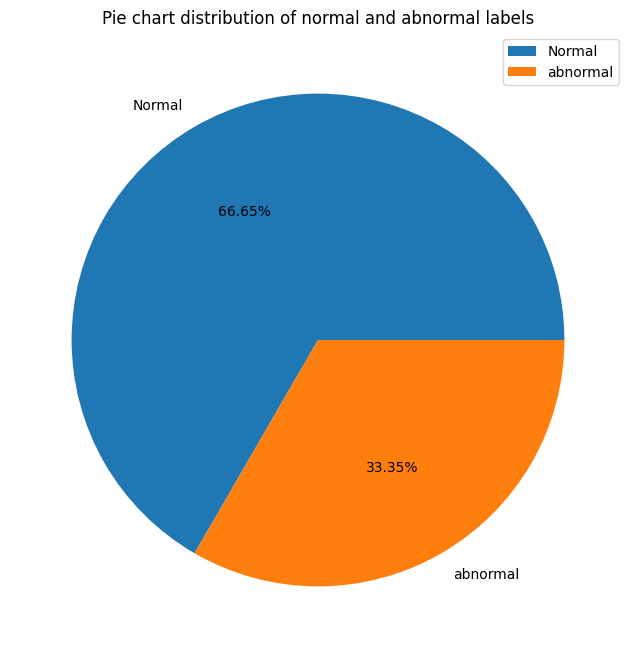

In [46]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(bin_data.Label.value_counts(),labels=bin_data.Label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.savefig('Pie_chart_binary.png')
plt.show()

In [39]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

<ipython-input-39-3ad456acdc98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = bin_data['intrusion']


In [40]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

Down/Up_Ratio        0.509473
Pkt_Len_Min          0.543155
Init_Bwd_Win_Byts    0.587147
Src_Port             0.624833
Protocol             0.710033
intrusion            1.000000
Name: intrusion, dtype: float64

In [41]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['Down/Up_Ratio','Pkt_Len_Min','Init_Bwd_Win_Byts','Src_Port','Protocol']]

In [43]:
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','Normal','Label']])

In [45]:
# saving final dataset to disk
bin_data.to_csv("bin_data.csv")
# final dataset for binary classification
bin_data

,Down/Up_Ratio,Pkt_Len_Min,Init_Bwd_Win_Byts,Src_Port,Protocol,intrusion,abnormal,Normal,Label
0,-0.767976,-0.384251,2.477885,-0.759847,0.057304,0,0,1,Normal
1,0.143285,-0.384251,2.420659,1.608301,0.057304,0,0,1,Normal
2,0.143285,-0.384251,2.420659,0.783030,0.057304,0,0,1,Normal
3,0.143285,-0.384251,2.420615,-0.777205,0.057304,0,0,1,Normal
4,0.143285,-0.384251,2.420659,1.930986,0.057304,0,0,1,Normal
...,...,...,...,...,...,...,...,...,...
205162,0.143285,-0.384251,-0.415265,1.088268,0.057304,1,1,0,abnormal
205163,0.143285,-0.384251,-0.415265,1.088312,0.057304,1,1,0,abnormal
205164,-0.767976,-0.384251,-0.408592,1.214003,0.057304,1,1,0,abnormal
205165,0.143285,-0.384251,-0.415265,1.088268,0.057304,1,1,0,abnormal


In [47]:
X = bin_data.iloc[:,0:5] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [49]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [50]:
X_train = X_train.to_numpy()

In [51]:
X

,Down/Up_Ratio,Pkt_Len_Min,Init_Bwd_Win_Byts,Src_Port,Protocol
0,-0.767976,-0.384251,2.477885,-0.759847,0.057304
1,0.143285,-0.384251,2.420659,1.608301,0.057304
2,0.143285,-0.384251,2.420659,0.783030,0.057304
3,0.143285,-0.384251,2.420615,-0.777205,0.057304
4,0.143285,-0.384251,2.420659,1.930986,0.057304
...,...,...,...,...,...
205162,0.143285,-0.384251,-0.415265,1.088268,0.057304
205163,0.143285,-0.384251,-0.415265,1.088312,0.057304
205164,-0.767976,-0.384251,-0.408592,1.214003,0.057304
205165,0.143285,-0.384251,-0.415265,1.088268,0.057304


In [52]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [53]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

In [54]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
# summary of model layers
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 dense (Dense)               (None, 5, 1)              51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = lst.fit(x_train, y_train, epochs=100, batch_size=100,validation_split=0.2)

Epoch 1/100
1231/1231 [==============================] - 12s 8ms/step - loss: 0.2706 - accuracy: 0.8838 - val_loss: 0.2135 - val_accuracy: 0.8918
Epoch 2/100
1231/1231 [==============================] - 10s 8ms/step - loss: 0.1962 - accuracy: 0.9024 - val_loss: 0.1918 - val_accuracy: 0.9057
Epoch 3/100
1231/1231 [==============================] - 9s 7ms/step - loss: 0.1835 - accuracy: 0.9236 - val_loss: 0.1815 - val_accuracy: 0.9276
Epoch 4/100
1231/1231 [==============================] - 10s 8ms/step - loss: 0.1747 - accuracy: 0.9352 - val_loss: 0.1743 - val_accuracy: 0.9402
Epoch 5/100
1231/1231 [==============================] - 10s 8ms/step - loss: 0.1681 - accuracy: 0.9405 - val_loss: 0.1688 - val_accuracy: 0.9402
Epoch 6/100
1231/1231 [==============================] - 9s 7ms/step - loss: 0.1643 - accuracy: 0.9405 - val_loss: 0.1666 - val_accuracy: 0.9402
Epoch 7/100
1231/1231 [==============================] - 10s 8ms/step - loss: 0.1624 - accuracy: 0.9405 - val_loss: 0.1650 - v